# Assignment 1 - Your Name - QMUL Student ID

### `TASK 1: edit the header`

Edit the cell above to change "Your Name" to your name and "QMUL Student ID" to your QMUL student ID.

Tip: to edit a markdown cell, double click it.

### `Instructions`

Please read these instructions carefully. It is your responsibility to read and understand them all. If you have any questions, please email Jordan ASAP; he will not have time to help you if you email at the last minute!

#### What you will do

You will **load, clean, describe, analyse** and **discuss** a dataset.

For some tasks, you need to **write code**. For other tasks, you need to **describe in words some aspect of the data or your approach.**

In all tasks, your answers **must be your own work and your own writing**. Do not use services like DeepSeek or ChatGPT to write answers for you.

#### Evaluation

The assignment is worth 18% of your grade.

Your submission will be evaluated based on:

1. The correctness of the code: does it perform the tasks correctly?
2. The quality of your explanations: do you explain things clearly, in a logical order? Do you explain them succinctly, avoiding irrelevant detail?

The assignment is graded out of 90 points total. The weight of each task in points is indicated like this:

> `Task 3: describe the dataset` (5 points)

#### Writing

In QHF3004 and QHF3005, you have learned how to describe and explain graphs, figures and processes in clear terms. Draw on these skills as you complete this assignment!

#### Submission

The deadline is May 1st. You thus have a little over 1 week to prepare and submit the assignment.

When you have finished editing your `.ipynb` file, upload it to the QMplus submission point.
- NB: you cannot upload an altered version of `people_data.csv`; your code *must* work using the original `people_data.csv` file.

Remember to:
- [ ] Include your name and QMUL student ID in the header above;
- [ ] Double check that your notebook runs smoothly from a **fresh kernel**;
	- Tip: use the menu option `Kernel > Restart Kernel and Run All Cells...`
- [ ] Sign the declaration at the bottom of the notebook by ticking the checkboxes.

### `Task 2: load the data` (0 points)

This section is not worth any points, since we provide the code for you. However, it is essential to run this section — you need to have the data to analyse it later!

#### `Task 2.1: load the full dataset`

In [98]:
# Import packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
# Make sure the data file is in your current folder, so that you can read it.
filename = "./people_data.csv"  # CHANGE THIS LINE AS NEEDED SO THAT YOU CAN READ THE FILE

# Read the data as a pandas DataFrame
data_pd = pd.read_csv(filename, index_col=0)

# Print the first 5 rows of the data to verify that it loaded correctly.
data_pd.head(5)

,user_id,person_id,age,height,n_strokes,province,education,n_languages,volleyball,table_tennis,favourite_movie
0,U000,P1,19.0,173.0,29.0,Shandong,High School,2.0,FALSE,TRUE,your name
1,U000,P2,18.0,190.0,24.0,Jiangsu,High School,2.0,TRUE,TRUE,Harry Potter
2,U000,P3,18.0,192.0,15.0,Hubei,High School,2.0,TRUE,TRUE,12 Angry Men
3,U000,P4,18.0,177.0,20.0,Shandong,High School,2.0,FALSE,TRUE,Weathering with you
4,U000,P5,19.0,173.0,36.0,Heilongjiang,High School,2.0,FALSE,TRUE,Twilight


#### `Task 2.2: remove your entries`

The data were collected by you, the students of QHP4701. For your assignment, you should not study the data that you personally collected. In this section, you will delete your entries from the dataset.

All of the entries submitted by one student are indicated by the same `user_id`, which is a value ranging from `U000` to `U144`. For example, the student corresponding to `U000` uploaded the first five rows in the dataset.

**IMPORTANT**: change the line below so that `my_code` is *your* code. To see what your code is based on your student ID, look at `UserID_assignments.csv`.

In [100]:
my_code = 'U070'  # CHANGE THIS LINE TO YOUR CODE

my_entries_data = data_pd[data_pd.user_id==my_code]
kept_data = data_pd[data_pd.user_id!=my_code]

print("Shape of remaining data: ", kept_data.shape)
print("Shape of removed data: ", my_entries_data.shape)

Shape of remaining data:  (801, 11)
Shape of removed data:  (6, 11)


In [101]:
# Double check that none of your entries remain.
assert my_code not in data_pd.user_id

In [102]:
# Cast `data` to a numpy array, and delete pandas from the workspace.
del pd
columns = kept_data.columns
data = np.array(kept_data)
print(type(data))
print(data[:5])
assert isinstance(data, np.ndarray)

<class 'numpy.ndarray'>
[['U000' 'P1' 19.0 173.0 29.0 'Shandong' 'High School' 2.0 'FALSE' 'TRUE'
  'your name']
 ['U000' 'P2' 18.0 190.0 24.0 'Jiangsu' 'High School' 2.0 'TRUE' 'TRUE'
  'Harry Potter']
 ['U000' 'P3' 18.0 192.0 15.0 'Hubei' 'High School' 2.0 'TRUE' 'TRUE'
  '12 Angry Men']
 ['U000' 'P4' 18.0 177.0 20.0 'Shandong' 'High School' 2.0 'FALSE' 'TRUE'
  'Weathering with you']
 ['U000' 'P5' 19.0 173.0 36.0 'Heilongjiang' 'High School' 2.0 'FALSE'
  'TRUE' 'Twilight']]


Checklist so far:

- [ ] I used pandas to load the data in the original, unaltered CSV file.
- [ ] I used my user ID (in the variable `my_code`) to delete the rows that I contributed (if any).
- [ ] I deleted pandas from the workspace.
- [ ] The dataset is stored in the variable `data`, it has type numpy.ndarray, and **I will use numpy for the rest of this worksheet.**

### `Task 3: describe the dataset` (5 points)

**Describe the collected dataset in a paragraph (50–100 words).** You might address: how was it collected? Who collected it? What does each row indicate? What was the purpose of collecting the data? What are some interesting aspects of the data?

A data scientist must understand the data they deal with. Since you were involved in the data collection process and should have contributed to it, you should have the insight needed to answer the question above.

### `Task 4: clean the data` (15 points)

A data set, when it is loaded, is sometimes called a "raw" dataset. It is expected that the raw data may have many issues: some values may not be the correct data type; some values may be invalid; some values may be missing.

Your task is to **clean the dataset.** Ensure that each column in the dataset has the correct format and that its values have the appropriate range.

The correct format of each column was specified in `task_1_instructions.pdf` (See "Task 1: Data Collection Instructions" in the Assessment tab of the QMplus page.)

<div style="background: pink; margin: 2em; padding: 1em;">
    <p><strong>When your notebook is assessed, your code will be re-run using the original CSV file. Therefore:</strong></p>
    <p>All of the steps you write to clean the data must be done using Python commands.</p>
    <p>Do NOT change any values in the CSV file. Instead, write commands that edit the data array here in the notebook.</p>
    <p>Using numpy is allowed but using pandas is not.</p>
</div>

The field names are listed in `columns`. They are:

- `user_id` (the student who uploaded the row of data)
- `person_id`
- `age`
- `height`
- `n_strokes`
- `province`
- `education`
- `n_languages`
- `volleyball`
- `table_tennis`
- `favourite_movie`

In this section, you will clean all of these fields.

#### `Task 4.1: person_id`

All the values in the `person_id` column (column 2) should be P1, P2, P3, and so on. That is, it should be an uppercase "P" followed by a number, starting at 1 and continuing up to the number of samples submitted by each student.

For each student, check if they used the correct format. If not, replace the `person_id` values with ones in the correct format.

#### `Task 4.2: age, height, strokes, number of languages`

- The values in the columns `age`, `n_strokes` and `n_languages` should be integers.
- The values in the column `height` should be floats.
- Any of these values *may* be absent, in which case the value should be `None`.
    - NB: this means the Python `None` object, NOT the string "None".

If any values in these columns are not the correct format, convert them to the correct format.

Also check if there are any unusual values in the column: e.g., numbers that are not plausible ages, heights, etc. If a value is impossible or implausible (e.g., `age = -10`), then it should be replaced with a `None` object.

#### `Task 4.3: volleyball, table_tennis`

These two columns indicate whether the person liked volleyball and liked table tennis, respectively. The values in these columns should be booleans. However, you may notice that they are first loaded as strings.

Convert the values in these columns from `"TRUE"`, `"FALSE"` and `"NAN"` into `True`, `False` and `None`, respectively.

#### `Task 4.4: province, education, favourite_movie`

Since `province` and `education` were selected from drop-down menus, the format of these should already be consistent.

However, for convenience, it is nice if the values in `education` are in order when sorted alphabetically. I.e., instead of the values being:

    - "Doctorate degree (PhD)"
    - "High School"
    - "Postgraduate/ Master’s Degree (PG)"
    - "Undergraduate Degree (UG)"

Replace them with:

    - "4-Doctorate"
    - "1-High School"
    - "3-Postgraduate"
    - "2-Undergraduate"

Lastly, the `favourite_movie` field may have issues. Look at this column to make sure the formatting is consistent. Fix any issues that you detect.

For example, when using this column to see which films are most popular, you should be able to detect that `Titanic`, `"Titanic"`, and ` Titanic "` all indicate the same film. Therefore, you should process the values in this column so that extra quotation marks and spaces are removed. What other adjustments might you make?

#### YOUR CODE

Write code to handle all the data cleaning tasks in this section (4.1–4.4).

In [103]:
person_ids = [f'P{i+1}' for i in range(len(data))]


In [104]:
ages = []
heights = []
n_strokes_list = []
n_languages_list = []

for row in data:
    try:
        age = int(row[2])
        ages.append(age if 0 < age < 120 else None)
    except:
        ages.append(None)

    try:
        height = float(row[3])
        heights.append(height if 100 < height < 250 else None)
    except:
        heights.append(None)

    try:
        strokes = int(row[4])
        n_strokes_list.append(strokes if 0 <= strokes < 100 else None)
    except:
        n_strokes_list.append(None)

    try:
        n_lang = int(row[7])
        n_languages_list.append(n_lang if 0 <= n_lang <= 20 else None)
    except:
        n_languages_list.append(None)


In [105]:
volleyballs = []
table_tennises = []
for row in data:
    v = row[8].strip().lower()
    if v == "true":
        volleyballs.append(True)
    elif v == "false":
        volleyballs.append(False)
    else:
        volleyballs.append(None)

    t = row[9].strip().lower()
    if t == "true":
        table_tennises.append(True)
    elif t == "false":
        table_tennises.append(False)
    else:
        table_tennises.append(None)


In [106]:
provinces = []
educations = []
favourite_movies = []

EDUMAP= {
    "High School": "1-High School",
    "Undergraduate Degree (UG)": "2-Undergraduate",
    "Postgraduate/ Master’s Degree (PG)": "3-Postgraduate",
    "Doctorate degree (PhD)": "4-Doctorate"
}

for row in data:
    try:
        prov = row[5].strip()
        provinces.append(prov if prov else None)
    except:
        provinces.append(None)
    try:
        edu = row[6].strip()
        educations.append(EDUMAP.get(edu, None))
    except:
        educations.append(None)
    try:
        movie = str(row[10]).strip().strip('"').strip().lower().capitalize()
        favourite_movies.append(movie if movie else None)
    except:
        favourite_movies.append(None)


In [107]:
user_ids = data[:, 0]

clean_data = np.array([
    [
        user_ids[i],
        person_ids[i],
        ages[i],
        heights[i],
        n_strokes_list[i],
        provinces[i],
        educations[i],
        n_languages_list[i],
        volleyballs[i],
        table_tennises[i],
        favourite_movies[i]
    ]
    for i in range(len(data))
], dtype=object)


#### YOUR EXPLANATION

Explain all the issues you observed in the data and and what actions you have taken to clean it.

### `Task 5: create summary functions` (10 points)

Write three functions, including docstrings, that are capable of (1) summing, (2) averaging and (3) taking the standard deviation of arrays. Each function must be able to *ignore **null values***: i.e., it should ignore `None` and `np.nan`. (`np.nan` is a special numpy value that stands for "not a number", and serves the same purpose as `None`.)

You should define:

- `sum_with_none`: a function that takes a list or numpy array as input and returns two values:
    1. the sum of all the numbers in it, excluding null values; and
    2. the number of non-null values in it.
    - For example, `sum_with_none([1, 2, 3, None, np.nan])` should return `(6, 3)`.
- `mean_with_none`: a function that takes a list or numpy array as input and returns the average of its non-null values.
- `std_with_none`: a function that takes a list or numpy array as input and returns the standard deviation of its non-null values.


Tip: you should re-use the functions you define. E.g., the code in `mean_with_none` should use the function `sum_with_none`.

For each function, add a doctring that explains what the inputs should be, and what the expected output of the function is.

The docstring is what you will see when you type `help(sum_with_none)`. Read the docstrings of other Python functions for examples of how to write these.


In [22]:
def sum_with_none(x):
    cleaned = [x1 for x1 in x if x1 is not None and not (isinstance(x1, float) and np.isnan(x1))]
    sum_x = sum(cleaned)
    return sum_x

def mean_with_none(x):
    cleaned = [x1 for x1 in x if x1 is not None and not (isinstance(x1, float) and np.isnan(x1))]
    mean_x = sum(cleaned)/len(cleaned)
    return mean_x

def std_with_none(x):
    cleaned = [x1 for x1 in x if x1 is not None and not (isinstance(x1, float) and np.isnan(x1))]
    std_x = np.std(cleaned)
    return std_x

#### `Test your functions`

Run these examples to test whether you have correctly defined the functions.

In [23]:
x1 = [1,3,5,None,4, np.nan]

assert sum_with_none(x1) == 13
assert mean_with_none(x1) == 3.25
assert std_with_none(x1) == 1.479019945774904

x2 = np.array([20,10,None,10,np.nan, 30])

assert sum_with_none(x2) == 70
assert mean_with_none(x2) == 17.5
assert std_with_none(x2) == 8.2915619758885

#### `Print your docstrings`

Run these commands to see whether you have defined docstrings, and if you are satisfied with them.

In [24]:
help(sum_with_none)

Help on function sum_with_none in module __main__:

sum_with_none(x)



In [25]:
help(mean_with_none)

Help on function mean_with_none in module __main__:

mean_with_none(x)



In [26]:
help(std_with_none)

Help on function std_with_none in module __main__:

std_with_none(x)



### `Task 6: compute and visualise` (40 points)

#### `Task 6.1: average and standard deviation` (10 points)

* Compute the average and standard deviation of (1) age (2) height (3) number of languages, and (4) number of strokes in their name. Use your functions (`mean_with_none` and `std_with_none`) to do so. Print them.
  
* Discuss your results in 50–100 words.

#### YOUR CODE

In [27]:
print(f"Age Mean: {mean_with_none(ages):.2f}, Std: {std_with_none(ages):.2f}")

Age Mean: 25.66, Std: 12.93


In [108]:
print(f"Height Mean: {mean_with_none(heights):.2f}, Std: {std_with_none(heights):.2f}")

Height Mean: 172.15, Std: 9.02


In [29]:
print(f"Languages Mean: {mean_with_none(n_languages_list):.2f}, Std: {std_with_none(n_languages_list):.2f}")

Languages Mean: 2.29, Std: 0.98


In [30]:
print(f"Strokes Mean: {mean_with_none(n_strokes_list):.2f}, Std: {std_with_none(n_strokes_list):.2f}")

Strokes Mean: 22.78, Std: 8.07


#### YOUR EXPLANATION

#### `Task 6.2: language and education level` (10 points)

What is the average number of languages known by respondents? Does this vary with their level of education?

- Compute the number of respondents at each level of education.
    - Plot these numbers as a bar chart, using `plt.bar`.
    - Make sure that each bar is labelled with the education level.
    - Also add a title to your plot (use `plt.title`).
- For the set of respondents at each level of education, find the average number of languages that they know.
    - Plot the results in a line graph, using `plt.plot`.
    - Label the graph sufficiently.


#### YOUR CODE

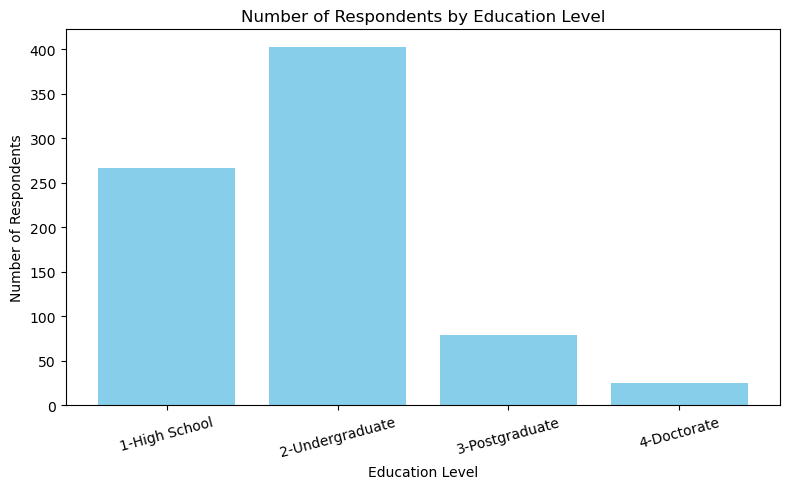

In [34]:
edu_counts = {edu : 0 for edu in EDUMAP.values()}
for edu in educations:
    if  edu :
        edu_counts[edu] += 1


edu_levels = list(edu_counts.keys())
edu_nums = list(edu_counts.values())

plt.figure(figsize=(8, 5))
plt.bar(edu_levels, edu_nums, color='skyblue')
plt.title("Number of Respondents by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

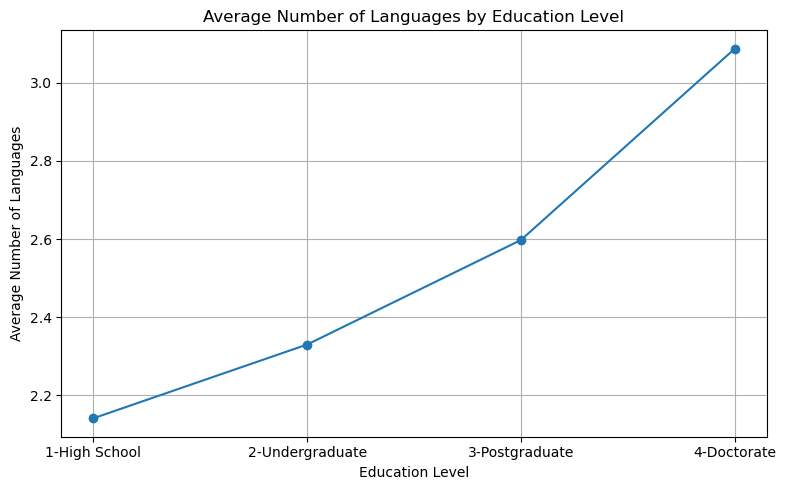

In [35]:
edu_langs = {edu: [] for edu in EDUMAP.values()}
for edu, lang in zip(educations, n_languages_list):
    if edu and lang is not None and not (isinstance(lang, float) and np.isnan(lang)):
        edu_langs[edu].append(lang)

edu_avg_langs = {edu: np.mean(vals) for edu, vals in edu_langs.items()}

edu_levels_sorted = sorted(edu_avg_langs.keys()) 
avg_langs = [edu_avg_langs[edu] for edu in edu_levels_sorted]

plt.figure(figsize=(8, 5))
plt.plot(edu_levels_sorted, avg_langs, marker='o', linestyle='-')
plt.title("Average Number of Languages by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Number of Languages")
plt.grid(True)
plt.tight_layout()
plt.show()

#### YOUR EXPLANATION

Explain your strategy for coding a solution to this task. How did you compute the average values (for `n_languages`) within each group of respondents (grouped by `education`)?

What are your results, and do they make sense?

Discuss the above in 50–100 words.

    
#### `Task 6.3: Sport popularity by province` (10 points)

Estimate the popularity of the two sports (volleyball and table tennis) by province, and find the provinces in which each sport is most and least popular.

- First, calculate the number of people in the dataset from each province. For the rest of this task, only consider provinces **with at least 10 respondents.**
- Estimate the popularity of volleyball in each province (with at least 10 responses) using the fraction of non-null responses that are "True".
    - If the responses for a province were `[True, True, True, False, False, None, None]`, then the popularity should be 0.60 (three `True` responses compared with five total responses).
- Do the same for table tennis.
- Find the 3 provinces in which each sport is most popular.
- Find the 3 provinces in which each sport is least popular.
- Find the province with the greatest difference in popularity between volleyball and table tennis.

#### YOUR CODE

In [51]:
provinces = np.array(provinces)
volleyball = np.array(volleyballs, dtype=object)
table_tennis = np.array(table_tennises, dtype=object)

unique_provinces =list(set(provinces))

province_list = []
volley_popularity = []
table_popularity = []
respondent_counts = []

for prov in unique_provinces:
    idx = provinces == prov
    count = np.sum(idx)
    if count < 10:
        continue  
    respondent_counts.append(count)
    province_list.append(prov)
    vball = volleyball[idx]
    
    vball_rate = np.sum(vball == True) / len(vball) if len(vball) > 0 else 0
    volley_popularity.append(vball_rate)

    tball = table_tennis[idx]
    
    tball_rate = np.sum(tball == True) / len(tball) if len(tball) > 0 else 0
    table_popularity.append(tball_rate)

volley_popularity = np.array(volley_popularity)
table_popularity = np.array(table_popularity)
province_list = np.array(province_list)

In [52]:

top3_volley_idx = np.argsort(-volley_popularity)[:3]
print("排球最受欢迎的3个省份：", province_list[top3_volley_idx])
bottom3_volley_idx = np.argsort(volley_popularity)[:3]
print("排球最不受欢迎的3个省份：", province_list[bottom3_volley_idx])
top3_table_idx = np.argsort(-table_popularity)[:3]
print("乒乓球最受欢迎的3个省份：", province_list[top3_table_idx])
bottom3_table_idx = np.argsort(table_popularity)[:3]
print("乒乓球最不受欢迎的3个省份：", province_list[bottom3_table_idx])


排球最受欢迎的3个省份： ['Hainan' 'Heilongjiang' 'Guizhou']
排球最不受欢迎的3个省份： [None 'Hunan' 'Jiangxi']
乒乓球最受欢迎的3个省份： ['Guizhou' 'Hainan' 'Xinjiang']
乒乓球最不受欢迎的3个省份： [None 'Liaoning' 'Jiangxi']


In [53]:
diff = np.abs(volley_popularity - table_popularity)
most_diff_idx = np.argmax(diff)
print("排球和乒乓球受欢迎度差异最大的省份:", province_list[most_diff_idx])


排球和乒乓球受欢迎度差异最大的省份: Xinjiang


#### YOUR EXPLANATION

Describe your approach to calculating the above values.

Discuss the results (in 50–100 words). Do they make sense? Do the results seem plausible? Are there any unusual values?

####  `Task 6.4: distribution of stroke counts` (10 points)

- Calculate the minimum, average, maximum and standard deviation (min/avg/max/std) of the number of strokes in the respondents' names.
- Second, plot a histogram of the stroke counts using `plt.hist`.
    - Adjust the input parameters of `plt.hist` until you can clearly see the distribution of the stroke counts.
    - You should be able to recognise that the distribution approximates a normal distribution, or "bell curve".
- Third, define a function `generate_n_strokes` that can generate a random, realistic value of `n_strokes`. (Hint: your solution will make use of `np.random.randn`.)
- Finally, use `generate_n_strokes` to create a list of 800 values, and calculate the min/avg/max/std of this new list. Compare these values to the real data.

#### YOUR CODE

In [46]:
clean_stroke_counts = [s for s in n_strokes_list if s is not None]
strokes = np.array(clean_stroke_counts)


min_stroke = np.min(strokes)
avg_stroke = np.mean(strokes)
max_stroke = np.max(strokes)
std_stroke = np.std(strokes)

print(f"最小值: {min_stroke}, 平均值: {avg_stroke:.2f}, 最大值: {max_stroke}, 标准差: {std_stroke:.2f}")

最小值: 2, 平均值: 22.78, 最大值: 56, 标准差: 8.07


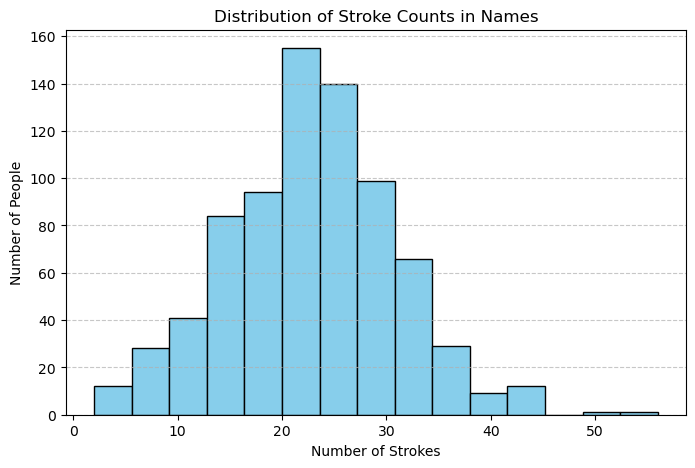

In [47]:
plt.figure(figsize=(8, 5))
plt.hist(strokes, bins=15, edgecolor='black', color='skyblue')
plt.title("Distribution of Stroke Counts in Names")
plt.xlabel("Number of Strokes")
plt.ylabel("Number of People")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [49]:
def generate_n_strokes():

    n_strokes = np.random.randint(2, 57) 
    return n_strokes

In [50]:
simulated = [generate_n_strokes() for _ in range(800)]
sim_strokes_array = np.array(simulated)

print(f"最小值: {np.min(sim_strokes_array)}, 平均值: {np.mean(sim_strokes_array):.2f}, 最大值: {np.max(sim_strokes_array)}, 标准差: {np.std(sim_strokes_array):.2f}")


最小值: 2, 平均值: 29.23, 最大值: 56, 标准差: 15.82


#### YOUR EXPLANATION

In 50–100 words:

- Discuss your code decisions for writing `generate_n_strokes`.
- Compare the synthetic data (that you generated) to the real data. Are they different? How and why?

### `Task 7: compare rows and users` (20 points)

Which two rows (respondents) in the data set are most similar? Are there any identical ones?

To answer questions like these, we need a method of computing the "distance" between two rows. You have seen in previous worksheets and lectures that the **Euclidean distance** is a common distance metric to compare points in a 2D space, and that it generalises easily to N-dimensional spaces.

In this section, you will define a function `row_distance(row1, row2)` that accepts two rows from your array `data` and returns the "distance" between them.

#### Normalisation

Before you can define that function, you need to determine an appropriate scale for each variable. To do this, you will use "min-max normalisation".

The approach of min-max normalisation is:

- find the minimum of the values
- find the maximum of the values
- linearly rescale all the values to lie between a new minimum of 0 and a new maximum of 1

For example, if a set of values is `[-5, 0, 0, None, 3]`, then the min-max normalised values would be `[0, 0.625, 0.625, None, 1]`.

Some data may need to be converted into numeric data types before they can be normalised. For example, `education` level could be converted from `str` to `int`, and `volleyball` could be converted from `bool` to `int`.


#### `Task 7.1: define a distance function`

- Define a function `row_distance(row1, row2)` that computes the Euclidean distance between two data points (i.e., two rows, or two people) from the dataset.
    - The function should rescale each input value according to the minimum and maximum values of the dataset.
    - The function does *not* need to use each column. For example, it may exclude the "favourite film" column if you cannot think of a way to turn this into a distance.
- Write a docstring that explains how the function works. The docstring should explain which features are included and how null values are handled.

#### `Task 7.2: find similar data`

- 7.2.1: Use `row_distance` to find the nearest data point `row_A` to YOU in the dataset.
    - I.e., find the person with the nearest age/height/n_languages/etc. to you, personally.
    - Discuss: is it possible that `row_A` is actually about you?
- 7.2.2: Use `row_distance` to find the two nearest data points `row_X` and `row_Y` in the dataset.
    - Print their original (un-normalised) values and compare them.
    - Discuss whether you think these could be the same person or not.
- 7.2.3: Use `row_distance` to find the two data contributors `user1` and `user2` (each identified by a `user_id` between `U001` and `U144`) whose data are most similar to each other.
    - Explain your approach to this task. Note that you need to compare not just two rows, but two *sets of rows*.
    - Discuss whether you think these two contributors may have uploaded the same data.

#### YOUR CODE

Write code for solving tasks 7.1–7.2 here.

In [86]:
def row_distance(row1, row2):
    dist = 0
    count = 0
    for i in range(2, 10):
        val1 = row1[i]
        val2 = row2[i]
        try:
            if np.isnan(val1) or np.isnan(val2):
                return np.inf
        except TypeError:
            continue
        dist += (val1 - val2) ** 2
        count += 1
    
    if count != 8:
        return np.inf
 
    return np.sqrt(dist)

In [110]:
data=clean_data.copy()
provinces = data[:, 5]
unique_provinces = list(set(prov for prov in provinces if prov is not None))
province_map = {prov: idx for idx, prov in enumerate(unique_provinces)}
for i in range(len(data)):
    if data[i, 5] is not None:
        data[i, 5] = province_map[data[i, 5]]

edu_map = {'1-High School': 0, '2-Undergraduate': 1, '3-Postgraduate': 2, '4-Doctorate': 3}
for i in range(len(data)):
    if data[i, 6] in edu_map:
        data[i, 6] = edu_map[data[i, 6]]
    elif data[i, 6] is not None:
        data[i, 6] = 0 

for col in [8, 9]:
    for i in range(len(data)):
        if data[i, col] == 'TRUE':
            data[i, col] = 1
        elif data[i, col] =="FALSE":
            data[i, col] = 0


for col in range(2, 10):
    col_values = np.array([x for x in data[:, col] if x is not None], dtype=float)
    if len(col_values) == 0:
        continue
    min_val = np.min(col_values)
    max_val = np.max(col_values)
    if min_val == max_val:
        continue  
    for i in range(len(data)):
        if data[i, col] is not None:
            data[i, col] = (float(data[i, col]) - min_val) / (max_val - min_val)


In [117]:
clean_array = data[:, 2:10].astype(float)  

min_list = np.nanmin(clean_array, axis=0)
max_list = np.nanmax(clean_array, axis=0)
my_row = np.array(['U070','P802',18, 170, 2, province_map['Fujian'], edu_map['1-High School'],2, 1, 0], dtype=object)

for i in range(len(max_list)):
    min_val = min_list[i]
    max_val = max_list[i]
    if max_val != min_val:
        my_row[i+2] = (my_row[i+2] - min_val) / (max_val - min_val)
    else:
        my_row[i+2] = 0  


In [119]:
min_dist=np.inf
for i in range(len(data)):
    dist=row_distance(data[i], my_row)
    if dist < min_dist:
        min_dist = dist
        row_A = clean_data[i]
print("最相似的行：")
print("Row A:", row_A)

最相似的行：
Row A: ['U096' 'P549' 20 193.2 25 'Zhejiang' '2-Undergraduate' 4 True False
 'The truman show']


In [120]:
min_dist = np.inf
row_X = row_Y = None

for i in range(len(data)):
    for j in range(i + 1, len(data)):
        dist = row_distance(data[i], data[j])
        if dist < min_dist:
            min_dist = dist
            row_X = clean_data[i]
            row_Y = clean_data[j]
print("最相似的两行：")
print("Row X:", row_X) 
print("Row Y:", row_Y)


最相似的两行：
Row X: ['U034' 'P204' 19 186.0 17 'Hebei' '2-Undergraduate' 2 True True
 'Zootopia']
Row Y: ['U035' 'P208' 19 186.0 17 'Hebei' '2-Undergraduate' 2 True True
 'Zootopia']


In [122]:

user_to_rows = {}

for i in range(len(data)):
    user_id = data[i][0]
    row = data[i]  
    if all(v is not None for v in row):
        if user_id not in user_to_rows:
            user_to_rows[user_id] = []
        user_to_rows[user_id].append(row)

def avg_distance(rows1, rows2):
    total_dist = 0
    count = 0
    for r1 in rows1:
        for r2 in rows2:
            total_dist += row_distance(r1, r2)
            count += 1
    return total_dist / count if count > 0 else float('inf')

min_dist = float('inf')
most_similar_pair = (None, None)

user_ids = list(user_to_rows.keys())

for i in range(len(user_ids)):
    for j in range(i + 1, len(user_ids)):
        user1 = user_ids[i]
        user2 = user_ids[j]
        dist = avg_distance(user_to_rows[user1], user_to_rows[user2])
        if dist < min_dist:
            min_dist = dist
            most_similar_pair = (user1, user2)

print("最相似的两个用户:", most_similar_pair)
print("平均距离:", min_dist)


最相似的两个用户: ('U140', 'U142')
平均距离: 0.3180265882938763


#### YOUR EXPLANATION

Your explanation for 7.1 should appear in the docstring of the function.

Add your discussion answers to 7.2 below, using up to 100 words. Your discussion should focus on 7.2.3: "Explain your approach to this task."

In [123]:
# Print the explanation for row_distance
help(row_distance)

Help on function row_distance in module __main__:

row_distance(row1, row2)



### `Task 8: submission checklists`

To tick the boxes below, double click on the segment, and change the empty tickboxes to checked ones: `[ ]` to `[x]`

<div style="padding: 10px; border: 2px solid blue;">
    
**Academic honesty declaration**
* [ ] I declare that I have completed this assignment on my own.
      
Your Name
</div>

<div style="padding: 10px; border: 2px solid blue;">
    
Before I uploaded my submission to QMplus, I checked that:

* [ ] My name and QMUL ID have been added to the top of the notebook.
* [ ] My name is in the **academic honesty declaration** above, and I have ticked the box to sign it.
* [ ] When I run `"Restart kernel and run all cells"`, all of the code runs without error and all the figures generate correctly.
* [ ] I have saved the notebook **after** running all cells and generating all figures.
* [ ] I have not edited the file `people_data.csv`; all the steps to clean and modify the data take place within this notebook.

</div>


Once you have affirmed all of the above, you may upload the `.ipynb` file directly to QMplus.

The deadline to submit your assignment is **Thursday the 1st of May, 2024 (2024-05-01) at 23:59 in China Standard Time.**.
